<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">
 
# Ensembles and Random Forests
 
_Author: Joseph Nelson (DC)_

*Adapted from Chapter 8 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)*

---

## Learning Objectives

Students will be able to:

- Understand how and why decision trees can be improved using bagging and random forests.
- Build random forest models for classification and regression.
- Know how to extract the most important predictors in a random forest model.


## Lesson Guide
- [Introduction](#introduction)
- [Part 1: Manual Ensembling](#part-one)
- [Part 2: Bagging](#part-two)
    - [Manually Implementing Bagged Decision Trees](#manual-bagged)
    - [Bagged Decision Trees in `scikit-learn`](#manual-sklearn)
    - [Estimating Out-of-Sample Error](#oos-error)
    
    
- [Part 3: Random Forests](#part-three)
- [Part 4: Building and Tuning Decision Trees and Random Forests](#part-four)
    - [Predicting Salary With a Random Forest](#random-forest-demo)
    - [Comparing Random Forests With Decision Trees](#comparing)
    
    
- [Optional: Tuning Individual Parameters](#tuning)
- [Summary](#summary)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

<a id="introduction"></a>
## Introduction

### What is Ensembling?

**Ensemble learning** is the process of combining several predictive models in order to produce a combined model that is more accurate than any individual model. For example, given predictions from several models we could:

- **Regression:** Take the average of the predictions.
- **Classification:** Take a vote and use the most common prediction.

For ensembling to work well, the models must be:

- **Accurate:** They outperform the null model.
- **Independent:** Their predictions are generated using different processes.

**The big idea:** If you have a collection of individually imperfect (and independent) models, the "one-off" mistakes made by each model are probably not going to be made by the rest of the models, and thus the mistakes will be discarded when you average the models.

### Ensembling works due to the concept of large numbers.
Popularized by wisdom of the crowds.

##### "the average of the results obtained from a large number of trials should be close to the expected value, and will tend to become closer as more trials are performed."

###### Let's take a random number from a standard normal distribution

In [26]:
np.random.normal()

-1.4710700822676834

###### The mean of a standard normal distribution is 0
And 98% of the values should be within -2 and 2

#### According to the law of large numbers if we take the mean of a very large sample size we should be closer to zero

In [39]:
x = range(1,50000, 100)
y = [np.mean([np.random.normal() for o in range(i)]) for i in x]

Text(0, 0.5, 'mean of samples')

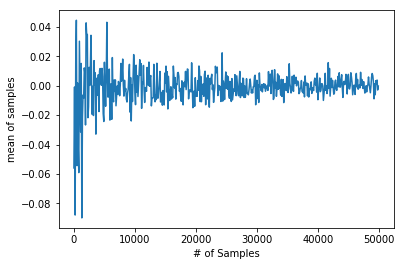

In [42]:
plt.plot(x,y)
plt.xlabel('# of Samples')
plt.ylabel('mean of samples')

<a id="part-one"></a>
## Part 1:  Ensembling Methods

a. Voting <br>
b. Averaging <br>
c. Bagging

##### a. Voting Classifiers

Voting Classifiers: 
- Train independent models 
- Have them each predict from the data set
- Make the final prediction be the majority vote choice

![Machine learning flowchart](assets/majority_vote.png)

##### b. Averaging

Averaging Models: 
- Train independent models 
- Have them each predict from the data set
- Make the final prediction the average of all the predictions

![Machine learning flowchart](assets/averaging.png)

##### c. Bagging

An important aspect of ensembling and the law of large numbers is that each weaker model must be independent. If they are correlated in some way, the final prediction will be biased towards their relationship.

Bagging increases the independence of the weaker learners by training them on different samples of the data.


**Bagging** is a procedure for reducing the variance of a machine learning method.
Bagging is short for **bootstrap aggregation**, meaning the aggregation of bootstrap samples.

A **bootstrap sample** is a random sample with replacement. So, it has the same size as the original sample but might duplicate some of the original observations.

**Bootstrapping** is taking these random samples with replacement

![Machine learning flowchart](assets/baging_annotated.png)

#### Coding Example

In [30]:
# Set a seed for reproducibility.
np.random.seed(1)

# Create an array of 1 through 20.
nums = np.arange(1, 21)
print('Total Population')
print(nums)

Total Population
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [31]:
for i in range(10):
    print(np.random.choice(a=nums, size=20, replace=True))

[ 6 12 13  9 10 12  6 16  1 17  2 13  8 14  7 19  6 19 12 11]
[15 19  5 10 18  1 14 10 10  8  2  1 18  9 14 20 16 11  9  8]
[ 4  7 18  4  5 18 12 13 17 14 20 10 19 16  1  5 16  3  8  9]
[10  4  8  5  6 20  7  9  1  3 11 16 16  8 20 11 15  1  2 18]
[14  4  1 14  7  7  3 13 12  8 14  9 12 13 12  5  8  8 14  5]
[17 19  1 14 11 18  8 11  1 13  2 10 19 20  2  3 13  8  3 11]
[ 1 10 19  7  3  8  8 17 16  6 18 11 17  6 14 18 19  2 11  1]
[ 8  1 20 18 15 14 12  7 14 16 10  3  8  6  5  6  9 14 18 18]
[16 14  9 15 14 17 11 14  4  3 15 15  1 12  4  2  3 20 17  1]
[19 11  9 14  4  1  9 14 19 16 10  1 13 20 18 11 13 16 15 20]


#### Summary:
- Ensembling is means aggregating predictions from independent models to create a more accurate model.
- Ensembling rests on the concept of law of large numbers, that the average of samples from a populations will approach the expected value the samples we have. Same concept between wisdom of crowds.
- For classification, we take majority vote among the weaker learners.
- For regression, we take the average
- To increase independence between the models, we can train them in bootstrapped samples which are random samples from the population with replacement

## Pt 2. Decision Tree Specific

There are decision trees specific models that use the concepts of voting, averaging, and bagging.

- Bagged Trees 
- Random Forrests

#### a. Bagged Trees

Bagged trees use the idea of bagging and apply it to a collection of decision trees

<b>How to train a bagged tree



1. Grow B trees using B bootstrap samples from the training data.
2. Train each tree on its bootstrap sample and make predictions.
3. Combine the predictions:
    - Average the predictions for **regression trees**.
    - Take a vote for **classification trees**.

![Machine learning flowchart](assets/bagged_tree.png)



Notes:

- **Each bootstrap sample** should be the same size as the original training set. (It may contain repeated rows.)
- **B** should be a large enough value that the error seems to have "stabilized".
- The trees are **grown deep** so that they have low bias/high variance.

Bagging increases predictive accuracy by **reducing the variance**, similar to how cross-validation reduces the variance associated with train/test split (for estimating out-of-sample error) by splitting many times an averaging the results.

The more trees and independence, the less variance because of the law of large numbers

Text(0, 0.5, 'mean of samples')

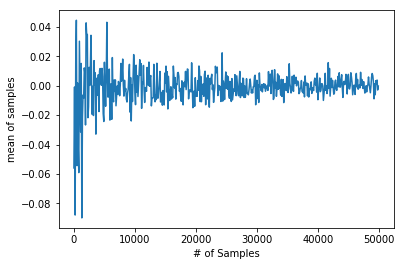

In [43]:
plt.plot(x,y)
plt.xlabel('# of Samples')
plt.ylabel('mean of samples')

<a id="part-three"></a>
#### b. Random Forests

Random Forests offer a **slight variation on bagged trees** with even better performance.
To add independence we also train the models on random set of features





#### Random forrests randomize:
- Data through bagging
- It then bags the features: at every step of splitting it chooses the best feature out of a ramdom sample.

![Machine learning flowchart](assets/random_forrest.png)

##### Building A Random Forrest Model

- Exactly like bagging, we create an ensemble of decision trees using bootstrapped samples of the training set.
- However, when building each tree, each time a split is considered, a **random sample of m features** is chosen as split candidates from the **full set of p features**. The split is only allowed to use **one of those m features**.
    - A new random sample of features is chosen for **every single tree at every single split**.
    - For **classification**, m is typically chosen to be the square root of p.
    - For **regression**, m is typically chosen to be somewhere between p/3 and p.

How does it create independence?

- Suppose there is **one very strong feature** in the data set. When using bagged trees, most of the trees will use that feature as the top split, resulting in an ensemble of similar trees that are **highly correlated**.
- Averaging highly correlated quantities does not significantly reduce variance (which is the entire goal of bagging).

### Manual Implementation of Bagged Decision Trees (with B=10)

In [49]:
# Read in and prepare the vehicle training data.
import pandas as pd
from sklearn.model_selection import train_test_split

path = './data/insurance-med-expenses.csv'
expense = pd.read_csv(path)
expense.rename(columns={'expenses': 'med_expense'}, inplace=True)

In [50]:
expense.head()

,age,sex,bmi,sport,children,smoker,region,med_expense
0,19,female,27.9,3,0,yes,southwest,16884.92
1,18,male,33.8,3,1,no,southeast,1725.55
2,28,male,33.0,2,3,no,southeast,4449.46
3,33,male,22.7,2,0,no,northwest,21984.47
4,32,male,28.9,2,0,no,northwest,3866.86


In [51]:
expense.describe()

,age,bmi,sport,children,med_expense
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.409567,1.094918,13270.422414
std,14.049960,6.098382,1.009883,1.205493,12110.011240
min,18.000000,16.000000,0.000000,0.000000,1121.870000
25%,27.000000,26.300000,1.000000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,2.000000,16639.915000
max,64.000000,53.100000,3.000000,5.000000,63770.430000


##### This is A Continuous Problem

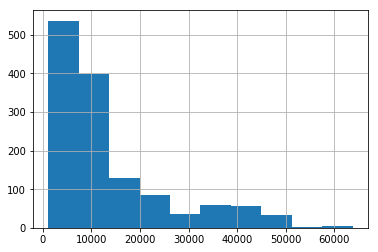

In [52]:
expense.med_expense.hist()

###### Create Dummy Variables

In [53]:
# Create dummy variables using get_dummies from Pandas.
expense_dummies = pd.get_dummies(expense[['sex','smoker','region']])
# Drop complimentary variables
expense_dummies.drop(['sex_male','smoker_no'], axis=1, inplace=True)
# Concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns).
expense_dummies = pd.concat([expense, expense_dummies], axis=1)

##### Train & Test Split

In [54]:
# Define X and y. Include all variables except for variables 
# that we've encoded and the dependent variable.
feature_cols = [x for x in expense_dummies.columns.values 
                if x not in ['sex','smoker','region','med_expense']]

X = expense_dummies[feature_cols]
y = expense_dummies.med_expense

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

##### Create Bootstrapped Samples

In [55]:
# Set a seed for reproducibility.
np.random.seed(123)

# Create ten bootstrap samples (which will be used to select rows from the DataFrame).
samples = [np.random.choice(a=X_train.shape[0], size=X_train.shape[0], replace=True) for _ in range(1, 11)]
samples

[array([1122, 1041,  106, ...,  411,  794,  998]),
 array([867, 893, 479, ..., 737, 718, 634]),
 array([ 216,   51,  419, ..., 1020, 1144,  482]),
 array([  12,  816,  341, ...,  712, 1258,  102]),
 array([410,  54, 722, ..., 240, 347, 987]),
 array([281, 809, 464, ..., 859,  65, 491]),
 array([1026, 1076, 1146, ...,  960,  282,  100]),
 array([1146,  923,  675, ...,  541,  308, 1000]),
 array([ 945,  300,  920, ...,  349,  529, 1082]),
 array([ 839,  355, 1133, ...,   49, 1224,  114])]

In [56]:
# Show the rows for the first decision tree.
X_train.iloc[samples[0], :].head()

,age,bmi,sport,children,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1305,24,27.7,2,0,1,0,0,0,1,0
913,44,27.5,1,1,1,0,0,0,0,1
1324,31,25.9,2,1,0,0,0,1,0,0
392,48,31.4,1,1,0,0,1,0,0,0
189,29,32.1,2,2,1,0,0,1,0,0


#### Train a Tree For Each Sample

In [57]:
from sklearn.tree import DecisionTreeRegressor

# Grow each tree deep.
treereg = DecisionTreeRegressor(max_depth=None, random_state=123)

# List for storing predicted price from each tree:
predictions = []

# Grow one tree for each bootstrap sample and make predictions on testing data.
for sample in samples:
    X_train_sample = X_train.iloc[sample,]
    y_train_sample = y_train.iloc[sample,]
    treereg.fit(X_train_sample, y_train_sample)
    y_pred = treereg.predict(X_test)
    predictions.append(y_pred)

##### Predictions Of All Trees

In [58]:
predictions = np.array(predictions)
predictions[:2]

array([[ 9500.57,  4889.04, 28950.47,  9193.84, 34779.62,  4762.33,
         2128.43, 14349.85, 23288.93, 11015.17, 20745.99,  7729.65,
         3171.61, 45702.02, 49577.66, 45702.02,  8703.46, 42211.14,
         7742.11, 37829.72,  4877.98,  7740.34,  1253.94,  2166.73,
        11015.17, 10825.25, 12638.2 ,  4618.08,  9500.57,  1135.94,
         7986.48, 12430.95,  2026.97,  4906.41,  3578.  , 32108.66,
         2103.08,  6849.03, 22218.11, 38282.75, 24671.66,  2789.06,
        11070.54, 12129.61,  4266.17, 11365.95,  3077.1 ,  4618.08,
        40941.29,  4266.17, 28287.9 ,  1720.35,  7153.55,  1705.62,
        11363.28, 10043.25,  4441.21, 39983.43, 11837.16, 10461.98,
        14254.61,  4949.76, 14119.62,  7749.16, 10797.34,  3736.46,
        19933.46],
       [ 8603.82,  5267.82, 28950.47,  9282.48, 36898.73,  5846.92,
         2128.43, 14410.93,  3353.47, 11015.17, 17361.77,  7729.65,
         3766.88, 60021.4 , 48970.25, 42760.5 , 10118.42, 41676.08,
         8547.69, 22331.57,  

In [59]:
# Average predictions.
np.mean(predictions, axis=0)

array([ 8851.128,  5003.133, 28500.572,  9131.081, 34930.832,  8484.491,
        2107.991, 14240.109,  7389.371, 11139.764, 18619.065,  7176.982,
        4060.039, 46656.125, 48401.958, 44520.048,  9791.423, 41883.74 ,
       11098.308, 24996.98 ,  4959.945,  8869.139,  1644.536,  2287.342,
       11492.323, 10919.106, 12751.18 ,  4373.96 ,  9277.356,  6835.083,
        8079.198, 11790.924,  5513.323,  5015.668,  3262.939, 12744.654,
        2350.642,  7230.033, 23725.136, 39359.313, 10596.795,  2472.857,
       13329.092, 14182.146,  5659.2  , 16170.351, 14682.074,  4537.018,
       43613.859,  6121.365, 15157.969,  1782.472,  6871.903,  1746.474,
       14266.18 , 10062.224,  3718.098, 38288.877, 11750.834, 10597.53 ,
       13578.557,  6048.143, 15913.992,  7697.12 , 11335.184,  5961.752,
       16725.751])

In [60]:
# Calculate RMSE.
from sklearn import metrics
y_pred = np.mean(predictions, axis=0)
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

4866.228706632299

<a id="manual-sklearn"></a>
#### Bagged Decision Trees in `scikit-learn` (with Trees=500)

In [61]:
# Instruct BaggingRegressor to use DecisionTreeRegressor as the "base estimator."
from sklearn.ensemble import BaggingRegressor
bagreg = BaggingRegressor(DecisionTreeRegressor(), n_estimators=500, 
                          bootstrap=True, oob_score=True, random_state=1)

In [62]:
# Fit and predict.
bagreg.fit(X_train, y_train)
y_pred = bagreg.predict(X_test)
y_pred

array([10015.75624   ,  5253.30272   , 28551.77736   , 12232.11268   ,
       35021.71112   ,  9038.75764   ,  2046.34452   , 14479.36674   ,
        6599.5704    , 11153.5447    , 19409.06286   ,  7034.99418   ,
        6214.81      , 45691.50762   , 48495.32406   , 44515.78814   ,
        9835.16768   , 43156.0232    ,  8840.04544   , 25601.10434   ,
        5773.2151    ,  9595.5829    ,  2565.73713   ,  2638.941     ,
       12274.0455    , 11220.94464   , 13439.0437    ,  5146.70602   ,
       10599.77462   ,  5200.07694   ,  7772.31542   , 11830.40628   ,
        2892.47668667,  5884.42888   ,  3366.14482   ,  8988.96024   ,
        2881.13096   ,  7639.38736   , 23463.4547    , 39370.9076    ,
        7506.69332   ,  3360.57866   , 12446.96786   , 15728.95496   ,
        5817.12596   , 14868.57538   , 19026.0913    ,  6038.4788    ,
       41728.363     ,  6262.24836   , 14094.03984   ,  2424.92786   ,
        6869.38876   ,  1765.77866   , 13259.49816   , 10303.96532   ,
      

In [63]:
# Calculate RMSE.
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

4807.708440440287

# Pt 3. Ensemble Tree Methods

- Out of Sample Error
- Feature Importance

Since we are taking random samples with replacement (bootstrapped samples), there are going to be data points that are not in the training data of some models.

We can these "out of bag" data points to test the accuracy of the models that were not trained by it.

<a id="oos-error"></a>
#### a. Out-of-Sample Error
We can calculate error metrics without using **train/test split** or **cross-validation**!

By using the points that were excluded from the sample!<br>
They are called "out-of-bag" observations.


In [54]:
# Show "in-bag" observations for the first bootstrap sample.
samples[0]

array([1122, 1041,  106, ...,  411,  794,  998])

In [55]:
# Show the "out-of-bag" observations for each sample.
np.array(sorted(set(range(X.shape[0])) - set(sample)))

array([   1,    4,    5,   22,   25,   28,   29,   30,   31,   33,   34,
         45,   47,   52,   54,   55,   60,   69,   70,   74,   77,   78,
         81,   82,   84,   93,   94,   99,  101,  102,  104,  107,  120,
        124,  126,  127,  129,  130,  135,  137,  138,  142,  144,  145,
        150,  152,  153,  156,  158,  159,  160,  162,  168,  174,  176,
        177,  178,  179,  183,  184,  185,  189,  196,  199,  202,  205,
        215,  216,  218,  220,  222,  223,  224,  226,  229,  230,  231,
        232,  238,  240,  242,  244,  245,  251,  252,  253,  256,  262,
        263,  265,  266,  267,  274,  278,  280,  284,  286,  289,  291,
        292,  295,  298,  303,  304,  305,  310,  313,  315,  317,  318,
        320,  321,  322,  324,  326,  327,  329,  330,  331,  332,  334,
        336,  337,  338,  340,  353,  358,  359,  362,  370,  371,  374,
        375,  376,  377,  378,  382,  383,  385,  387,  389,  390,  392,
        398,  401,  404,  405,  407,  408,  411,  4

**Calculating "out-of-bag error:"**

1. For each observation in the training data, predict its response value using **only** the trees in which that observation was out-of-bag. Average those predictions (for regression) or take a vote (for classification).
2. Compare all predictions to the actual response values in order to compute the out-of-bag error.

When B is sufficiently large, the **out-of-bag error** is an accurate estimate of **out-of-sample error**.

In [66]:
# Compute the out-of-bag R-squared score (not MSE, unfortunately) for B=500.
bagreg.oob_score_

0.8400674875651636

#### b. Estimating Feature Importance

Bagging increases **predictive accuracy** but decreases **model interpretability** because it's no longer possible to visualize the tree to understand the importance of each feature.

However, we can still obtain an overall summary of **feature importance** from bagged models:

- **Bagged regression trees:** Calculate the total amount that **MSE** decreases due to splits over a given feature, averaged over all trees
- **Bagged classification trees:** Calculate the total amount that **Gini index** decreases due to splits over a given feature, averaged over all trees

<b>Overview:</b>

 - Bagging takes samples from data by taking each point with replacement, the samples of called bootstrapped samples
 - Bagged Trees means training one decision tree on each of these bootstrapped samples then averaging out the results for the prediction
 - For classification it is taking a vote of the most popular prediction and for regression is taking the mean value.

<a id="part-four"></a>
## Part 4: Building and Tuning Decision Trees and Random Forests

In this section, we will implement random forests in scikit-learn.

This data was obtained by surveying the bank account holders. The purpose of the survey was to determine if account holders would purchase an additional product such as insurance marketed by the bank. Account holder either purchased an insurance product, or haven't, as indicated by `policy-purchase` variable.

### Preparing the Data

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

path = "data/bank-insurance.csv"
df = pd.read_csv(path)

df.drop(['first name','last name','email'], inplace=True, axis=1)
df.columns = ['age','educ','marr','occup','hered','ethnic','sex','policy']

print("Total number of rows - {}".format(df.shape[0]))
df.head()

Total number of rows - 48842


,age,educ,marr,occup,hered,ethnic,sex,policy
0,39,Bachelor degree,Never-married,Indoor Sedentary,other-family,Australian,Male,0
1,50,Bachelor degree,Married,Qualified Professional,first-degree family,Australian,Male,0
2,38,Vocational training,Divorced/Separated,Light Trades,other-family,Australian,Male,0
3,53,Secondary education,Married,Light Trades,first-degree family,Asian,Male,0
4,28,Bachelor degree,Married,Medical/Dental,first-degree family,Asian,Female,0


##### Dummy Variables

In [346]:
# Encoding variables
non_cat_feats = ['age','policy']
cat_feats = [col for col in df.columns 
             if col not in non_cat_feats]
# Create a DataFrame of dummy variables
df_dummies = pd.get_dummies(df[cat_feats], drop_first=True)

# Concatenate the original DataFrame and the dummy DataFrame.
df_dummies = pd.concat([df[[f for f in df if f not in cat_feats]], 
                        df_dummies], axis=1)

#### Defining X and y

In [348]:
target_feat = 'policy'
X = df_dummies[[c for c in df_dummies.columns if c != target_feat]]
y = df_dummies[target_feat]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123)

<a id="random-forest-demo"></a>
## Predicting Policy Purchase With a Random Forest

### Fitting a Random Forest With the Best Parameters

In [349]:
from sklearn.ensemble import RandomForestClassifier

#### Notice the unbalanced class distribution in the target variable

In [350]:
y_train.value_counts()

0    29727
1     9346
Name: policy, dtype: int64

#### We will handle the unbalanced class distribution by assigning a weight to the `positive class` (1 - purchased policy)

In [351]:
# Determine the weights of the positive class
denominator = y_train.value_counts().loc[1] / y_train.value_counts().sum()
numerator = 1 - denominator

positive_weight = int(round(numerator / denominator))
positive_weight

class_wgt = {
    1: positive_weight,
    0: 1
}

In [352]:
# max_features=5 is best and n_estimators=150 is sufficiently large.
rf = RandomForestClassifier(
    n_estimators=150,
    max_features=5,
    oob_score=True,
    random_state=1,
    class_weight=class_wgt)

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight={1: 3, 0: 1},
            criterion='gini', max_depth=None, max_features=5,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=None, oob_score=True, random_state=1,
            verbose=0, warm_start=False)

In [353]:
# Compute feature importances.
pd.DataFrame({'feature': X_train.columns.values, 
              'importance': rf.feature_importances_}).sort_values(by='importance', ascending=False).head()

,feature,importance
0,age,0.333315
7,marr_Married,0.197873
8,marr_Never-married,0.095727
17,hered_other-family,0.041986
21,sex_Male,0.036943


In [ ]:
from sklearn.model_selection import cross_val_score
# Compute the out-of-bag Accuracy score.
print('OOB Accuracy Score: ', rf.oob_score_)

# Find the average F1.
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='f1')
print('Mean F1 CV Scores: ', np.mean(scores))

OOB Accuracy Score:  0.7761625675018555


Evaluate the F1 Score on Training and Testing (more evaluating classification models in the next lesson!)

In [79]:
from sklearn.metrics import classification_report
print('TRAINING ACCURACY: ', rf.score(X_train, y_train))
print('TESTING ACCURACY:  ', rf.score(X_test, y_test), '\n')

y_test_preds = rf.predict(X_test)
print(classification_report(y_test, y_test_preds))

TRAINING ACCURACY:  0.8440611163719193
TESTING ACCURACY:   0.7794042378953834 

              precision    recall  f1-score   support

           0       0.91      0.79      0.85      7428
           1       0.53      0.74      0.62      2341

   micro avg       0.78      0.78      0.78      9769
   macro avg       0.72      0.77      0.73      9769
weighted avg       0.82      0.78      0.79      9769



We'll compare the performance of this model to the performance after some feature selection.

#### Reducing X to its Most Important Features

In [80]:
# Check the shape of X_train.
X_train.shape

(39073, 22)

##   Feature Selection: 

Reducing the number of features can have an effect on the performance of the model. <br>

Extra features introduce redundancies in data that can make the data be biased towards an outcome or overfit. <br>
It also reduces training speed and accuracy for space based models (KNN)

In [109]:
feature_importances = pd.DataFrame({'feature': X_train.columns.values, 
              'importance': rf.feature_importances_}).sort_values(by='importance', ascending=False)

In [110]:
feature_importances.head()

,feature,importance
0,age,0.339053
8,marr_Married,0.174130
9,marr_Never-married,0.092117
16,hered_first-degree family,0.061662
21,sex_Male,0.032344


###### One Option: Pick only the features above the mean feature importance (you can use median or based on your knowledge of the data)

In [120]:
mean_features_df = feature_importances[feature_importances.importance >= feature_importances.importance.mean()]
mean_features_df

,feature,importance
0,age,0.339053
8,marr_Married,0.174130
9,marr_Never-married,0.092117
16,hered_first-degree family,0.061662


In [121]:
mean_features = mean_features_df.feature
X_train_imp_mean = X_train[mean_features]

** Using only the features identified from `SelectFromModel`, let's re-train a new RandomForestClassifier on the training set **

In [122]:
rf2 = RandomForestClassifier(n_estimators=150, max_features=3, random_state=1, class_weight=class_wgt)
rf2.fit(X_train_imp_mean, y_train) # use feature importance input features of TRAINING

RandomForestClassifier(bootstrap=True, class_weight={1: 3, 0: 1},
            criterion='gini', max_depth=None, max_features=3,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=None, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

Using the fit model and the features from the train data to transform the test data

In [123]:
X_test_imp = slm_mean.transform(X_test)
print(X_test_imp.shape)

(9769, 4)


## Comparing Before Feature Selection & After

### Before

In [125]:
from sklearn.metrics import classification_report
print('TRAINING ACCURACY: ', rf.score(X_train, y_train))
print('TESTING ACCURACY:  ', rf.score(X_test, y_test), '\n')

y_test_preds = rf.predict(X_test)
print(classification_report(y_test, y_test_preds))

TRAINING ACCURACY:  0.8440611163719193
TESTING ACCURACY:   0.7794042378953834 

              precision    recall  f1-score   support

           0       0.91      0.79      0.85      7428
           1       0.53      0.74      0.62      2341

   micro avg       0.78      0.78      0.78      9769
   macro avg       0.72      0.77      0.73      9769
weighted avg       0.82      0.78      0.79      9769



### After

In [128]:
print('TRAINING ACCURACY: ', rf2.score(X_train_imp_mean, y_train))
print('TESTING ACCURACY:  ', rf2.score(X_test_imp, y_test), '\n')

y_test_preds = rf2.predict(X_test_imp)
print(classification_report(y_test, y_test_preds))

TRAINING ACCURACY:  0.7394108463644973
TESTING ACCURACY:   0.7412222335960692 

              precision    recall  f1-score   support

           0       0.93      0.72      0.81      7428
           1       0.48      0.82      0.60      2341

   micro avg       0.74      0.74      0.74      9769
   macro avg       0.70      0.77      0.71      9769
weighted avg       0.82      0.74      0.76      9769



#### Interpretation of the Change:

In this case, the F1 decreased slightly for our target class (1). But this might not tell the whole story.

**Although we lost overall performance from a machine learning perspective (F1 score), our recall improved overall which could be a benefit depending on the business problem.


<a id="comparing"></a>
## Comparing Random Forests With Decision Trees

**Advantages of random forests:**

- Their performance is competitive with the best supervised learning methods.
- They provide a more reliable estimate of feature importance.
- They allow you to estimate out-of-sample error without using train/test split or cross-validation.

**Disadvantages of random forests:**

- They are less interpretable.
- They are slower to train.
- They are slower to predict.

<a id="tuning"></a>
## Optional: Tuning Hyperparameters

In [131]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Tuning the model

There are a number of things that we can tune when using RandomForests. 
One important tuning parameter is **n_estimators**, which represents the number of trees that should be grown. This should be a large enough value that the error seems to have "stabilized."
The other important tuning parameter is **max_features**, which represents the number of features that should be considered at each split.

Using RandomizedSearchCV allows us to tune multiple parameter by fitting the model multiple times. 
**Please note that fitting the model 200 times would takes a few minutes to run. In fact, the number of model fits increases exponentially with the number of parameters**

In [132]:
from sklearn.model_selection import RandomizedSearchCV

###### HYPERPARAMETERS TO TUNE ######

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=10, stop=200, num=5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 20, num = 5)]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [340]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 2 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, random_state=42, n_jobs=-1,
                               param_distributions=random_grid, 
                               n_iter=5, cv=2, verbose=10, scoring='f1')
# Fit the random search model
rf_random.fit(X_train, y_train)

rf_random.best_params_

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0631s.) Setting batch_size=6.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished


{'n_estimators': 10,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 15,
 'bootstrap': True}

In [341]:
for i in  range(len(rf_random.cv_results_['params'])):
    print(rf_random.cv_results_['params'][i])
    print(rf_random.cv_results_['mean_test_score'][i])

{'n_estimators': 105, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 7, 'bootstrap': True}
0.48183434959349586
{'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}
0.5028268904205374
{'n_estimators': 10, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
0.48663677130044847
{'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 15, 'bootstrap': True}
0.5073595843999398
{'n_estimators': 57, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 7, 'bootstrap': True}
0.46708423548819467


In [139]:
rf_random.best_params_

{'n_estimators': 105,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [140]:
from sklearn import metrics

rf = RandomForestClassifier(**rf_random.best_params_)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('F1 score: %.2f' % metrics.f1_score(y_test, y_pred, pos_label=1))

F1 score: 0.58


## Other Ensembles: Boosting

#### Boosting

Instead of voting or averaging

Boosting involves training a seequence of models, with each model correcting it's predecessor. <br>
This can be done by adding weigths to the misclassified datasets.


## Example: AdaBoost

![Machine learning flowchart](assets/adaboost.png)

Steps to Train Adaboost:
- Give each point a weight of 1/n
- Train a model and notice the points that were wrongly predicted
- Increase the weights of the wrongly predicted and decrease for the correctly predicted
- Train another model on these weights
- Repeat the process until a stopping criteria (certain accuracy or # of trees)

### Others:
- Gradient Boosting
- XGBoost

In [166]:
from sklearn.ensemble import AdaBoostClassifier

In [167]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

**Pros and Cons of Boosting**
#### Pros
- Achieves higher performance than bagging when the hyperparameters are properly tuned.
- Works equally well for classification and regression.
- Can use "robust" loss functions that make the model resistant to outliers.   

#### Cons
- Difficult and time consuming to properly tune hyperparameters.
- Cannot be parallelized like bagging (bad scalability when there are huge amounts of data).
- Higher risk of overfitting compared to bagging.

<a id="summary"></a>
## Summary

**Which model is best?** The best classifier for a particular task is task-dependent. In many business cases, interpretability is more important than accuracy. So, decision trees may be preferred. In other cases, accuracy on unseen data might be paramount, in which case random forests would likely be better (since they typically overfit less). 

Remember that every model is a tradeoff between bias and variance. Ensemble models attempt to reduce overfitting by reducing variance but increasing bias (as compared to decision trees). By making the model more stable, we necessarily make it fit the training data less accurately. In some cases this is desired (particularly if we start with lots of overfitting), but for more simply structured data a simple decision tree might be best.

---

**In this lesson:**

- We looked at ensemble models.

- We saw how decision trees could be extended using two ensemble techniques -- bagging and random forests.

- We looked at methods of evaluating feature importance and tuning parameters.

# Use Case: Titanic Datasets V2

Increase the accuracy score of predicting survivors

Here is the data dictionary: <br>
https://www.kaggle.com/c/titanic/data

The current leaderboard has accuracy of 1. <br>
https://www.kaggle.com/c/titanic/leaderboard

Things to Try:
- Random Forrest & Adaboost
- Fill in null values (impute)
- remove outliers in the data
- be exhaustive with parameter tuning with RandomizedSearchCV
- different weights for the unbalanced data sets
- limiting to only the most important features

In [223]:
import seaborn as sns
from sklearn import tree, metrics
from sklearn.model_selection import cross_val_score, train_test_split

titanic = sns.load_dataset("titanic")
# Remove or impute null values
features = ['survived', 'class', 'sex', 'age', 'sibsp', 'parch', 'fare',  'deck', 'embark_town']
titanic['age'].fillna(titanic.age.mean(), inplace = True)
titanic = titanic[features]

In [224]:
titanic.head()

,survived,class,sex,age,sibsp,parch,fare,deck,embark_town
0,0,Third,male,22.0,1,0,7.2500,NaN,Southampton
1,1,First,female,38.0,1,0,71.2833,C,Cherbourg
2,1,Third,female,26.0,0,0,7.9250,NaN,Southampton
3,1,First,female,35.0,1,0,53.1000,C,Southampton
4,0,Third,male,35.0,0,0,8.0500,NaN,Southampton


In [225]:
titanic.shape

(891, 9)

#### Dealing With Null Values

In [226]:
titanic.isnull().sum()

survived         0
class            0
sex              0
age              0
sibsp            0
parch            0
fare             0
deck           688
embark_town      2
dtype: int64

##### Suggestions

- Fill Embark town with most popular town or try to use another column to guess (only two nulls)
- Full deck null values as 0 and filled in values as 1

In [227]:
titanic.head()

,survived,class,sex,age,sibsp,parch,fare,deck,embark_town
0,0,Third,male,22.0,1,0,7.2500,NaN,Southampton
1,1,First,female,38.0,1,0,71.2833,C,Cherbourg
2,1,Third,female,26.0,0,0,7.9250,NaN,Southampton
3,1,First,female,35.0,1,0,53.1000,C,Southampton
4,0,Third,male,35.0,0,0,8.0500,NaN,Southampton


#### Make Dummy Variables

In [250]:
#Make class categorical not continuous
class_dummies = pd.get_dummies(titanic[[ 'class', 'embark_town']])
titanic = pd.concat([titanic, class_dummies], axis=1) 

In [251]:
titanic.head()

,survived,class,sex,age,sibsp,parch,fare,deck,embark_town,class_First,...,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,Third,male,22.0,1,0,7.2500,NaN,Southampton,0,...,1,0,0,1,0,0,1,0,0,1
1,1,First,female,38.0,1,0,71.2833,C,Cherbourg,1,...,0,1,0,0,1,0,0,1,0,0
2,1,Third,female,26.0,0,0,7.9250,NaN,Southampton,0,...,1,0,0,1,0,0,1,0,0,1
3,1,First,female,35.0,1,0,53.1000,C,Southampton,1,...,0,0,0,1,1,0,0,0,0,1
4,0,Third,male,35.0,0,0,8.0500,NaN,Southampton,0,...,1,0,0,1,0,0,1,0,0,1


In [335]:
feature_names = ['age', 'fare']

X = titanic[feature_names]
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=46)

In [336]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [338]:
from sklearn.model_selection import RandomizedSearchCV

###### HYPERPARAMETERS TO TUNE ######

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=10, stop=200, num=5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 20, num = 5)]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

rf = RandomForestClassifier()


# Random search of parameters, using 2 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, random_state=42, n_jobs=-1,
                               param_distributions=random_grid, 
                               n_iter=50, cv=2, verbose=10, scoring='accuracy')
# Fit the random search model
rf_random.fit(X_train, y_train)

rf_random.best_params_

Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.7s finished


{'n_estimators': 57,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 11,
 'bootstrap': True}

In [339]:
for i in  range(len(rf_random.cv_results_['params'])):
    print(rf_random.cv_results_['params'][i])
    print(rf_random.cv_results_['mean_test_score'][i])
    

{'n_estimators': 10, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 3, 'bootstrap': True}
0.6811377245508982
{'n_estimators': 105, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': False}
0.6706586826347305
{'n_estimators': 57, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 11, 'bootstrap': True}
0.6976047904191617
{'n_estimators': 152, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 7, 'bootstrap': False}
0.6766467065868264
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 3, 'bootstrap': True}
0.6841317365269461
{'n_estimators': 57, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 15, 'bootstrap': False}
0.6631736526946108
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 15, 'b

### You can Add Weights to the Unbalanced Data Set

In [317]:
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [318]:
weight = round(549/342)
weight

2

In [319]:
class_wgt = {
    1: 2,
    0: 1
}

### Train Model

In [320]:
from sklearn import metrics

rf = RandomForestClassifier(**rf_random.best_params_, class_weight=class_wgt)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Accuracy score: %.2f' % metrics.accuracy_score(y_test, y_pred))

Accuracy score: 0.68


### Most Predictive Features

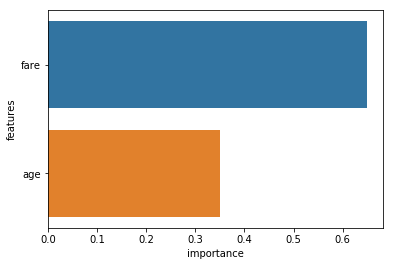

In [321]:
plot_df = pd.DataFrame({'features': X.columns, 'importance': rf.feature_importances_})\
                    .sort_values('importance', ascending= False)
sns.barplot(x = 'importance', y = 'features', data = plot_df.head(10), orient='h')

#### Do Feature Selection Using Only The Most Important Features

In [297]:
feature_importances = pd.DataFrame({'feature': X_train.columns.values, 
              'importance': rf.feature_importances_}).sort_values(by='importance', ascending=False)

mean_features_df = feature_importances[feature_importances.importance >= feature_importances.importance.mean()]
mean_features_df
mean_features = mean_features_df.feature
X_train_imp_mean = X_train[mean_features]
X_test_imp_mean = X_test[mean_features]

#### Compare Results

In [298]:
rf2 = RandomForestClassifier(n_estimators=150, max_features=1, random_state=1)
rf2.fit(X_train_imp_mean, y_train) # use feature importance input features of TRAINING

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [300]:
y_pred = rf2.predict(X_test_imp_mean)

print('Accuracy score: %.2f' % metrics.accuracy_score(y_test, y_pred))

Accuracy score: 0.64


## You can Save Your Model

In [323]:
import pickle as pkl

In [325]:
filename = 'final_model.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [327]:
saved_model = pkl.load(open(filename, 'rb'))

In [328]:
saved_model.predict(X_train)

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,

### Try Ada Boost